MNIST (<strong>Modified National Institute of Standards and Technology database</strong>) database is a large database of <b>grayscale</b> handwritten digits <br/>
It contains a collection of <strong>70,000</strong>,training set of <b>60,000</b> examples, test set of <b>10,000</b> examples ,<b>28 x 28</b> images of handwritten digits from 0 to 9.<br/>
It can be a useful starting point for developing and practicing a methodology for solving <b>image classification</b> tasks using convolutional neural networks

###### keytask
1. loading of the dataset
2. preparation of the dataset
3. definition of the model
4. evaluation of the model
5. presentation of results.

In [1]:
# importing libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
?mnist

Type:        module
String form: <module 'keras.datasets.mnist' from 'D:\\anaconda3\\lib\\site-packages\\keras\\datasets\\mnist.py'>
File:        d:\anaconda3\lib\site-packages\keras\datasets\mnist.py
Docstring:   MNIST handwritten digits dataset.


In [3]:
help(mnist)

Help on module keras.datasets.mnist in keras.datasets:

NAME
    keras.datasets.mnist - MNIST handwritten digits dataset.

FUNCTIONS
    load_data(path='mnist.npz')
        Loads the MNIST dataset.
        
        This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
        along with a test set of 10,000 images.
        More info can be found at the
        [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
        
        Args:
          path: path where to cache the dataset locally
            (relative to `~/.keras/datasets`).
        
        Returns:
          Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
        
        **x_train**: uint8 NumPy array of grayscale image data with shapes
          `(60000, 28, 28)`, containing the training data. Pixel values range
          from 0 to 255.
        
        **y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
          with shape `(60000,)` for the training data.
        
     

In [4]:
help(mnist.load_data())

Help on tuple object:

class tuple(object)
 |  tuple(iterable=(), /)
 |  
 |  Built-in immutable sequence.
 |  
 |  If no argument is given, the constructor returns an empty tuple.
 |  If iterable is specified the tuple is initialized from iterable's items.
 |  
 |  If the argument is a tuple, the return value is the same object.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __getnewargs__(self, /)
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /)
 |      Return self<

### Loading of the dataset

In [5]:
# load dataset
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [6]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
# Shape of Train & Test dataset
print('xtrain: ' + str(xtrain.shape))
print('ytrain: ' + str(ytrain.shape))
print('xtest:  '  + str(xtest.shape))
print('ytest:  '  + str(ytest.shape))

xtrain: (60000, 28, 28)
ytrain: (60000,)
xtest:  (10000, 28, 28)
ytest:  (10000,)


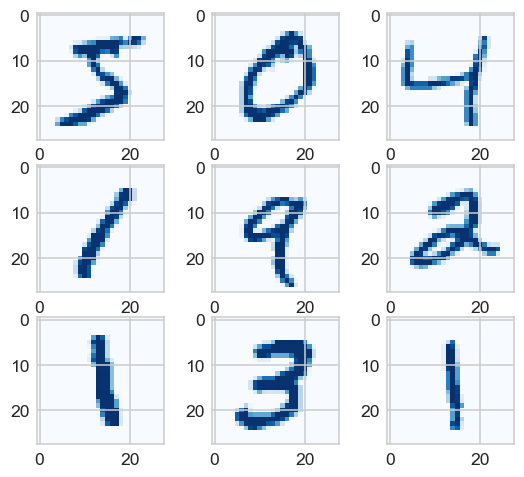

In [8]:
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(xtrain[i], cmap=plt.get_cmap('Blues'))
# show the figure
plt.show()

### Preparation of the dataset


In [9]:
# reshape arrays to have a single color channel
xtrain = xtrain.reshape((xtrain.shape[0], 28, 28, 1))
xtest = xtest.reshape((xtest.shape[0], 28, 28, 1))

In [10]:
xtrain[:5]

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


There are 10 classes and that classes are represented as unique integers.Using a one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value, and 0 values for all other classes.

In [11]:
# one hot encode target values
from tensorflow.keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [12]:
ytrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
# scaling/normalize dataset to range 0-1
xtrain = xtrain/255
xtest = xtest/255

In [14]:
xtrain, xtest

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

### Definition of the model


In [15]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

Defining a baseline convolutional neural network model, it has two main aspects: the feature extraction front end comprised of convolutional and pooling layers, and the classifier backend that will make a prediction.

In [16]:
# Define CNN Model

# Define Sequential model with 3 layers
    # Sequential([
    #     layers.Dense(no_of_filter, filter_size, activation = "relu", input_shape = (28,28), name="layer1"),
    #     layers.Dense(4,activation = "relu", input_shape = (28,28), name="layer1"),
    #     layers.Dense(16,activation = "relu", name="layer2")
    # ])

customNN = Sequential()

# input layer
customNN.add(Dense(4, activation = "relu",input_shape = (28,28)))

# Hidden layer
customNN.add(Dense(16,activation = "relu"))
customNN.add(Dense(32,activation = "relu"))
customNN.add(Dense(64,activation = "relu"))
customNN.add(Dense(100,activation = "relu"))
customNN.add(Dense(128,activation = "relu"))

# flatten() function is used to get a copy of an given array collapsed into one dimension.
customNN.add(Flatten())

# output layer
customNN.add(Dense(10,activation = "softmax"))


In [17]:
customNN.weights

[<tf.Variable 'dense/kernel:0' shape=(28, 4) dtype=float32, numpy=
 array([[ 0.22780082, -0.08000645, -0.18319249, -0.11865732],
        [-0.21990857,  0.3321896 , -0.39318222,  0.03921062],
        [ 0.387458  ,  0.36260906, -0.19132353, -0.1968215 ],
        [-0.07005429,  0.22445789, -0.01334974,  0.27539036],
        [-0.3142832 ,  0.14892593,  0.00683707,  0.26440516],
        [-0.12880945,  0.10400102,  0.06004587, -0.3601177 ],
        [ 0.40986577,  0.16161248, -0.40108305,  0.2370064 ],
        [-0.22233362, -0.07604584, -0.28084785,  0.00577071],
        [-0.22328787,  0.23678699, -0.41693312, -0.07229766],
        [ 0.4031826 ,  0.29991314,  0.26222923, -0.02621096],
        [ 0.3143542 , -0.17614007,  0.19243738, -0.10621732],
        [-0.05557668,  0.02191427, -0.38766217,  0.40202323],
        [-0.07851663,  0.20151946,  0.34378305,  0.17777023],
        [-0.02340433, -0.02401859,  0.38395563, -0.3908535 ],
        [ 0.16439196,  0.08212736, -0.4188581 , -0.4122017 ],
   

In [18]:
customNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 4)             116       
                                                                 
 dense_1 (Dense)             (None, 28, 16)            80        
                                                                 
 dense_2 (Dense)             (None, 28, 32)            544       
                                                                 
 dense_3 (Dense)             (None, 28, 64)            2112      
                                                                 
 dense_4 (Dense)             (None, 28, 100)           6500      
                                                                 
 dense_5 (Dense)             (None, 28, 128)           12928     
                                                                 
 flatten (Flatten)           (None, 3584)              0

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

SparseCategoricalCrossentropy takes integer value as input whereas categoricalCrossentropy takes in one_hot continuous representation

In [21]:
# compile model
customNN.compile(optimizer="adam", loss= "categorical_crossentropy", metrics=["accuracy"])

In [22]:
# fit model
customNN.fit(xtrain,ytrain, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 12ms/step - loss: 0.4106 - accuracy: 0.8709
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2048 - accuracy: 0.9382
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1602 - accuracy: 0.9506
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1399 - accuracy: 0.9574
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1264 - accuracy: 0.9613
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1179 - accuracy: 0.9635
Epoch 7/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1075 - accuracy: 0.9675
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1014 - accuracy: 0.9688
Epoch 9/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0951 - accuracy: 0.9703
Epoch 10/10
1875/1875 [==============================] - 26s 14m

In [23]:
# predict for xtest 
pred = customNN.predict(xtest)
pred

313/313 [==============================] - 2s 5ms/step


array([[1.6839094e-23, 8.5981183e-14, 4.1058687e-10, ..., 9.9997735e-01,
        1.7648686e-17, 1.9720787e-09],
       [3.4496201e-13, 4.6436508e-05, 9.9979693e-01, ..., 4.7499651e-18,
        7.5373035e-05, 2.6743171e-17],
       [3.5095834e-18, 9.9757868e-01, 3.8607608e-04, ..., 3.5346241e-04,
        1.0201442e-06, 2.0295776e-09],
       ...,
       [9.4045424e-15, 9.8188896e-12, 7.3918343e-09, ..., 2.3306027e-05,
        2.1769886e-04, 2.4241970e-03],
       [1.2150595e-05, 9.3566016e-11, 1.0979236e-06, ..., 1.4332677e-07,
        1.6273954e-03, 4.8093483e-07],
       [1.9119804e-09, 2.0483186e-17, 3.1514929e-07, ..., 6.7721459e-21,
        2.8935297e-08, 2.4685576e-10]], dtype=float32)

In [24]:
p = np.argmax(pred,axis=1)
p

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [25]:
target = np.argmax(ytest,axis=1)
target

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

### Evaluation of the model

In [26]:
# Prediction result
for i in range(10):
    print("{}. Predicted Class: {}, Actual: {}, {}".format( i, p[i], target[i], ("Matched" if p[i]==target[i] else "Not Matched") ))

0. Predicted Class: 7, Actual: 7, Matched
1. Predicted Class: 2, Actual: 2, Matched
2. Predicted Class: 1, Actual: 1, Matched
3. Predicted Class: 0, Actual: 0, Matched
4. Predicted Class: 4, Actual: 4, Matched
5. Predicted Class: 1, Actual: 1, Matched
6. Predicted Class: 4, Actual: 4, Matched
7. Predicted Class: 9, Actual: 9, Matched
8. Predicted Class: 6, Actual: 5, Not Matched
9. Predicted Class: 9, Actual: 9, Matched


In [27]:
# Loss vs Accuracy
customNN.evaluate(xtest, ytest)

313/313 [==============================] - 2s 5ms/step - loss: 0.1400 - accuracy: 0.9611


[0.14001162350177765, 0.9610999822616577]

In [28]:
!pip install opencv-python

In [29]:
import cv2

def input_prepare(img):
    img = np.asarray(img)              # convert to array 
    img = cv2.resize(img, (28, 28 ))   # resize to target shape 
    img = cv2.bitwise_not(img)         # [optional] turned bg to black - {bitwise_not} turns 1's into 0's and 0's into 1's
    img = img / 255                    # normalize 
    img = img.reshape(1, 784)          # reshape it to input placeholder shape
    return img 

img = cv2.imread('4.jpg')
orig = img.copy() # save for plotting later on 
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # gray scaling 
img = input_prepare(img)
print(img.shape)


pred = customNN.predict(img)
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
plt.title(np.argmax(pred, axis=1))
plt.show()

(1, 784)


InvalidArgumentError: Graph execution error:

Detected at node 'sequential/dense/Tensordot/GatherV2_1' defined at (most recent call last):
    File "D:\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "D:\anaconda3\lib\runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "D:\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\Deadpool\AppData\Roaming\Python\Python37\site-packages\traitlets\config\application.py", line 1041, in launch_instance
      app.start()
    File "D:\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 583, in start
      self.io_loop.start()
    File "C:\Users\Deadpool\AppData\Roaming\Python\Python37\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "D:\anaconda3\lib\asyncio\base_events.py", line 541, in run_forever
      self._run_once()
    File "D:\anaconda3\lib\asyncio\base_events.py", line 1786, in _run_once
      handle._run()
    File "D:\anaconda3\lib\asyncio\events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Deadpool\AppData\Roaming\Python\Python37\site-packages\tornado\ioloop.py", line 687, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "C:\Users\Deadpool\AppData\Roaming\Python\Python37\site-packages\tornado\ioloop.py", line 740, in _run_callback
      ret = callback()
    File "C:\Users\Deadpool\AppData\Roaming\Python\Python37\site-packages\tornado\gen.py", line 821, in inner
      self.ctx_run(self.run)
    File "C:\Users\Deadpool\AppData\Roaming\Python\Python37\site-packages\tornado\gen.py", line 782, in run
      yielded = self.gen.send(value)
    File "D:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 361, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "C:\Users\Deadpool\AppData\Roaming\Python\Python37\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "D:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "C:\Users\Deadpool\AppData\Roaming\Python\Python37\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "D:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 541, in execute_request
      user_expressions, allow_stdin,
    File "C:\Users\Deadpool\AppData\Roaming\Python\Python37\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "D:\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 300, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "D:\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2976, in run_cell
      raw_cell, store_history, silent, shell_futures, cell_id
    File "D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "D:\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3258, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-29-509e1856bd1e>", line 18, in <module>
      pred = customNN.predict(img)
    File "D:\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 2350, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 2137, in predict_function
      return step_function(self, iterator)
    File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 2123, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 2111, in run_step
      outputs = model.predict_step(data)
    File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
      return self(x, training=False)
    File "D:\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "D:\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "D:\anaconda3\lib\site-packages\keras\engine\sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "D:\anaconda3\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "D:\anaconda3\lib\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "D:\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "D:\anaconda3\lib\site-packages\keras\layers\core\dense.py", line 244, in call
      outputs = tf.tensordot(inputs, self.kernel, [[rank - 1], [0]])
Node: 'sequential/dense/Tensordot/GatherV2_1'
indices[0] = 2 is not in [0, 2)
	 [[{{node sequential/dense/Tensordot/GatherV2_1}}]] [Op:__inference_predict_function_82024]

### General Way

In [30]:
# CNN in general way
model = Sequential([customNN, tf.keras.layers.Softmax()])
np.argmax(model(xtest,ytest),axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [31]:
# test input
x = tf.ones((3,3))
x

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>